In [4]:
import numpy as np
import pandas as pd

In [5]:
health_df = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/datasets/healthcare-dataset-stroke-data-full.csv")
health_df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Have_they_gotten_stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
health_df.shape

(5110, 12)

In [7]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5110 non-null   int64  
 1   gender                   5110 non-null   object 
 2   age                      5110 non-null   float64
 3   hypertension             5110 non-null   int64  
 4   heart_disease            5110 non-null   int64  
 5   ever_married             5110 non-null   object 
 6   work_type                5110 non-null   object 
 7   Residence_type           5110 non-null   object 
 8   avg_glucose_level        5110 non-null   float64
 9   bmi                      4909 non-null   float64
 10  smoking_status           5110 non-null   object 
 11  Have_they_gotten_stroke  5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
#PREPROCCESSING

In [9]:
# Replacing unknown with np.nan
health_df['smoking_status'] = health_df['smoking_status'].replace('Unknown',np.nan)

In [10]:
health_df['Have_they_gotten_stroke'].value_counts()

0    4861
1     249
Name: Have_they_gotten_stroke, dtype: int64

In [11]:
# Creating the male data 
stroke_male = health_df[health_df['gender'] == 'Male']

In [12]:
stroke_male

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Have_they_gotten_stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5097,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,NaN,0
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,NaN,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [13]:
# Creating the female data
stroke_female = health_df[health_df['gender'] == 'Female']

In [14]:
stroke_female

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Have_they_gotten_stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,NaN,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [15]:
stroke_female.isnull().sum()

id                           0
gender                       0
age                          0
hypertension                 0
heart_disease                0
ever_married                 0
work_type                    0
Residence_type               0
avg_glucose_level            0
bmi                         97
smoking_status             836
Have_they_gotten_stroke      0
dtype: int64

In [16]:
# Mean of BMI in females
stroke_female.bmi.mean()

29.065757680358992

In [17]:
stroke_female['bmi'].fillna(stroke_female['bmi'].mean(),inplace=True)

<ipython-input-17-de34640d18ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_female['bmi'].fillna(stroke_female['bmi'].mean(),inplace=True)


In [18]:
stroke_female.isnull().sum()

id                           0
gender                       0
age                          0
hypertension                 0
heart_disease                0
ever_married                 0
work_type                    0
Residence_type               0
avg_glucose_level            0
bmi                          0
smoking_status             836
Have_they_gotten_stroke      0
dtype: int64

In [19]:
# Mean BMI in males
stroke_male.bmi.mean()

28.64793635007459

In [20]:
stroke_male['bmi'].fillna(stroke_male['bmi'].mean(),inplace=True)

<ipython-input-20-f7a8b75915a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_male['bmi'].fillna(stroke_male['bmi'].mean(),inplace=True)


In [21]:
stroke_male.isnull().sum()

id                           0
gender                       0
age                          0
hypertension                 0
heart_disease                0
ever_married                 0
work_type                    0
Residence_type               0
avg_glucose_level            0
bmi                          0
smoking_status             708
Have_they_gotten_stroke      0
dtype: int64

In [22]:
health_df = health_df.drop(health_df[health_df['gender'] == 'male'],axis=1)

In [23]:
health_df = pd.concat([stroke_female,stroke_male])
health_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Have_they_gotten_stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,29.065758,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5097,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.800000,NaN,0
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.500000,NaN,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,28.647936,smokes,0
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.300000,never smoked,0


In [24]:
health_df.isnull().sum()

id                            0
gender                        0
age                           0
hypertension                  0
heart_disease                 0
ever_married                  0
work_type                     0
Residence_type                0
avg_glucose_level             0
bmi                           0
smoking_status             1544
Have_they_gotten_stroke       0
dtype: int64

In [25]:
# Dropping the smoking status column
health_df = health_df.drop('smoking_status',axis=1,inplace =True)

In [26]:
health_df = pd.concat([stroke_male,stroke_female])

In [27]:
health_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Have_they_gotten_stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,28.647936,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.600000,NaN,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,29.065758,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [28]:
health_df['age'] = health_df['age'].astype(int)

In [29]:
health_df.dtypes

id                           int64
gender                      object
age                          int64
hypertension                 int64
heart_disease                int64
ever_married                object
work_type                   object
Residence_type              object
avg_glucose_level          float64
bmi                        float64
smoking_status              object
Have_they_gotten_stroke      int64
dtype: object

In [30]:
health_df.drop('smoking_status',axis=1,inplace=True)

In [31]:
health_df.isnull().sum()

id                         0
gender                     0
age                        0
hypertension               0
heart_disease              0
ever_married               0
work_type                  0
Residence_type             0
avg_glucose_level          0
bmi                        0
Have_they_gotten_stroke    0
dtype: int64

In [32]:
# Encoding gender 
health_df['gender'] = health_df['gender'].map({'Male':0,'Female':1})

In [33]:
health_df['ever_married'] = health_df['ever_married'].map({'Yes':1,'No':0})

In [34]:
health_df['Residence_type'] = health_df['Residence_type'].map({'Urban':1,'Rural':0})

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
one_hot = OneHotEncoder()
work_type = one_hot.fit_transform(health_df.work_type.values.reshape(-1,1)).toarray()

In [37]:
work_type

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [38]:
work_type = health_df['work_type']

In [39]:
work_type_df = pd.DataFrame(work_type,columns=['work_type'])

In [40]:
work_type_df['work_type'].unique()

array(['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked'],
      dtype=object)

In [41]:
one_hot = OneHotEncoder(sparse=False)
encoded = one_hot.fit_transform(work_type_df)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
encoded = pd.DataFrame(encoded,columns = ['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked'])
encoded

,Private,Govt_job,Self-employed,children,Never_worked
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
5104,0.0,0.0,0.0,0.0,1.0
5105,0.0,0.0,1.0,0.0,0.0
5106,0.0,0.0,0.0,1.0,0.0
5107,0.0,0.0,0.0,1.0,0.0


In [43]:
merged_stroke = pd.merge(left = health_df , right = encoded,left_index=True,right_index = True)

In [44]:
merged_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,Have_they_gotten_stroke,Private,Govt_job,Self-employed,children,Never_worked
0,9046,0,67,0,1,1,Private,1,228.69,36.600000,1,0.0,0.0,1.0,0.0,0.0
2,31112,0,80,0,1,1,Private,0,105.92,32.500000,1,0.0,0.0,1.0,0.0,0.0
5,56669,0,81,0,0,1,Private,1,186.21,29.000000,1,0.0,0.0,1.0,0.0,0.0
6,53882,0,74,1,1,1,Private,0,70.09,27.400000,1,0.0,0.0,1.0,0.0,0.0
13,8213,0,78,0,1,1,Private,1,219.84,28.647936,1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,22127,1,18,0,0,0,Private,1,82.85,46.900000,0,0.0,0.0,1.0,0.0,0.0
5104,14180,1,13,0,0,0,children,0,103.08,18.600000,0,0.0,0.0,0.0,0.0,1.0
5105,18234,1,80,1,0,1,Private,1,83.75,29.065758,0,0.0,0.0,1.0,0.0,0.0
5106,44873,1,81,0,0,1,Self-employed,1,125.20,40.000000,0,0.0,0.0,0.0,1.0,0.0


In [45]:
merged_stroke.drop('work_type',axis=1,inplace=True)

In [46]:
merged_stroke

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Have_they_gotten_stroke,Private,Govt_job,Self-employed,children,Never_worked
0,9046,0,67,0,1,1,1,228.69,36.600000,1,0.0,0.0,1.0,0.0,0.0
2,31112,0,80,0,1,1,0,105.92,32.500000,1,0.0,0.0,1.0,0.0,0.0
5,56669,0,81,0,0,1,1,186.21,29.000000,1,0.0,0.0,1.0,0.0,0.0
6,53882,0,74,1,1,1,0,70.09,27.400000,1,0.0,0.0,1.0,0.0,0.0
13,8213,0,78,0,1,1,1,219.84,28.647936,1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,22127,1,18,0,0,0,1,82.85,46.900000,0,0.0,0.0,1.0,0.0,0.0
5104,14180,1,13,0,0,0,0,103.08,18.600000,0,0.0,0.0,0.0,0.0,1.0
5105,18234,1,80,1,0,1,1,83.75,29.065758,0,0.0,0.0,1.0,0.0,0.0
5106,44873,1,81,0,0,1,1,125.20,40.000000,0,0.0,0.0,0.0,1.0,0.0


In [47]:
health_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,Have_they_gotten_stroke
0,9046,0,67,0,1,1,Private,1,228.69,36.600000,1
2,31112,0,80,0,1,1,Private,0,105.92,32.500000,1
5,56669,0,81,0,0,1,Private,1,186.21,29.000000,1
6,53882,0,74,1,1,1,Private,0,70.09,27.400000,1
13,8213,0,78,0,1,1,Private,1,219.84,28.647936,1


In [50]:
import plotly.express as px

fig = px.histogram(health_df,
                   x='work_type',
                   barmode='group',
                   text_auto=True,
                   labels={
                       'work_type': 'Work Type',
                       'count': 'No. of People'
                   },
                   template='plotly_dark')

In [51]:
fig.show()

In [53]:
import plotly.express as px

fig1 = px.box(health_df,
             x='Have_they_gotten_stroke',
             y='age',
             color='gender',
             template='plotly_dark',
             labels={'age': 'Age of the people'},
             color_discrete_sequence=px.colors.qualitative.Alphabet)
fig1.show()

In [54]:
fig2 = px.box(health_df,
             x='Have_they_gotten_stroke',
             y='avg_glucose_level',
             color='gender',
             color_discrete_sequence=px.colors.qualitative.Alphabet,
             labels={'avg_glucose_level': 'Average Glucose Level'},
             template='plotly_dark')
fig2.show()

In [56]:
fig3 = px.histogram(health_df,
                   x='ever_married',
                   barmode='group',
                   color='Have_they_gotten_stroke',
                   text_auto=True,
                   labels={'ever_married': 'Marraige Status'},
                   template='plotly_dark',
                   )
fig3.show()

In [57]:
fig4 = px.histogram(health_df,
                   x='heart_disease',
                   color='Have_they_gotten_stroke',
                   barmode='group',
                   labels={'heart_disease': 'Heart Disease Category'},
                   text_auto=True,
                   template='plotly_dark')
fig4.show()

In [59]:
# Storing outliers index
gluc = health_df[(health_df['avg_glucose_level'] > 167)
              & (health_df['Have_they_gotten_stroke'] == 0)].index
gluc

Int64Index([ 272,  293,  298,  303,  307,  325,  332,  343,  386,  396,
            ...
            4925, 4941, 4995, 5001, 5006, 5029, 5034, 5035, 5062, 5076],
           dtype='int64', length=551)

In [60]:
# Avg_glucose_level outliers removed dataframe
test_df = merged_stroke.drop(gluc,axis=0)
test_df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Have_they_gotten_stroke,Private,Govt_job,Self-employed,children,Never_worked
0,9046,0,67,0,1,1,1,228.69,36.600000,1,0.0,0.0,1.0,0.0,0.0
2,31112,0,80,0,1,1,0,105.92,32.500000,1,0.0,0.0,1.0,0.0,0.0
5,56669,0,81,0,0,1,1,186.21,29.000000,1,0.0,0.0,1.0,0.0,0.0
6,53882,0,74,1,1,1,0,70.09,27.400000,1,0.0,0.0,1.0,0.0,0.0
13,8213,0,78,0,1,1,1,219.84,28.647936,1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,22127,1,18,0,0,0,1,82.85,46.900000,0,0.0,0.0,1.0,0.0,0.0
5104,14180,1,13,0,0,0,0,103.08,18.600000,0,0.0,0.0,0.0,0.0,1.0
5105,18234,1,80,1,0,1,1,83.75,29.065758,0,0.0,0.0,1.0,0.0,0.0
5106,44873,1,81,0,0,1,1,125.20,40.000000,0,0.0,0.0,0.0,1.0,0.0


In [61]:
# orignial dataframe
merged_stroke

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Have_they_gotten_stroke,Private,Govt_job,Self-employed,children,Never_worked
0,9046,0,67,0,1,1,1,228.69,36.600000,1,0.0,0.0,1.0,0.0,0.0
2,31112,0,80,0,1,1,0,105.92,32.500000,1,0.0,0.0,1.0,0.0,0.0
5,56669,0,81,0,0,1,1,186.21,29.000000,1,0.0,0.0,1.0,0.0,0.0
6,53882,0,74,1,1,1,0,70.09,27.400000,1,0.0,0.0,1.0,0.0,0.0
13,8213,0,78,0,1,1,1,219.84,28.647936,1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,22127,1,18,0,0,0,1,82.85,46.900000,0,0.0,0.0,1.0,0.0,0.0
5104,14180,1,13,0,0,0,0,103.08,18.600000,0,0.0,0.0,0.0,0.0,1.0
5105,18234,1,80,1,0,1,1,83.75,29.065758,0,0.0,0.0,1.0,0.0,0.0
5106,44873,1,81,0,0,1,1,125.20,40.000000,0,0.0,0.0,0.0,1.0,0.0


In [62]:
#Modelling

In [63]:
X = merged_stroke.drop('Have_they_gotten_stroke', axis=1)
y = merged_stroke['Have_they_gotten_stroke']

In [64]:
from sklearn.model_selection import train_test_split,cross_validate
train_x, val_x, train_y, val_y = train_test_split(X,y,test_size = 0.2,random_state=2)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#train_model 
clf_0 = LogisticRegression().fit(train_x,train_y)

In [67]:
pred_y_0 = clf_0.predict(val_x)
accuracy_score(pred_y_0,val_y)

0.9422700587084148

<Axes: >

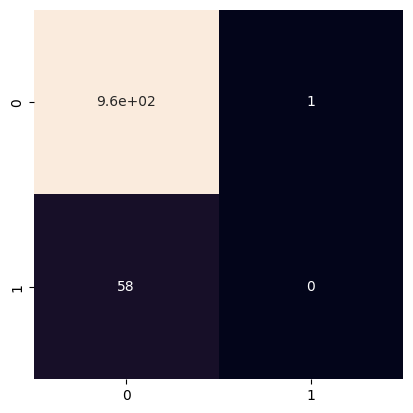

In [70]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(val_y,pred_y_0)

sns.heatmap(cm,square = True,annot = True,cbar= False)

In [72]:
pred_test = clf_0.predict(val_x)

predictions_test_final = ['Y' if y>0.5 else 'N' for y in pred_test]
#predictions_test_final

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(val_y, pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       964
           1       0.00      0.00      0.00        58

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.94      0.92      1022



In [74]:
from sklearn.neighbors import KNeighborsClassifier
#train_model 
KNN = KNeighborsClassifier().fit(train_x,train_y)

pred_y_0 = KNN.predict(val_x)
accuracy_score(pred_y_0,val_y)

0.9412915851272016

In [75]:
pred_test = KNN.predict(val_x)

predictions_test_final = ['Y' if y>0.5 else 'N' for y in pred_test]
#predictions_test_final